# PREDICTION USING SUPERVISED ML

Predict the percentage of a student based on the number of study hours.

In [1]:
#First importing the python libraries
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#Reading the given data
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
print("Data imported successfully:)")

Data imported successfully:)


In [3]:
#Analysing the Data frame
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#To find the Data head
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#To find the Data Tail
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#FInding the whole information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
#Describing the function to know the stats of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'Scores vs Hours')

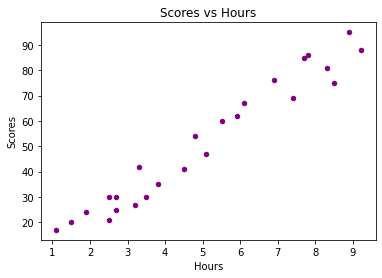

In [8]:
#Creating the scatter plot
df.plot.scatter(x='Hours',y='Scores',c='purple')
plt.title('Scores vs Hours')

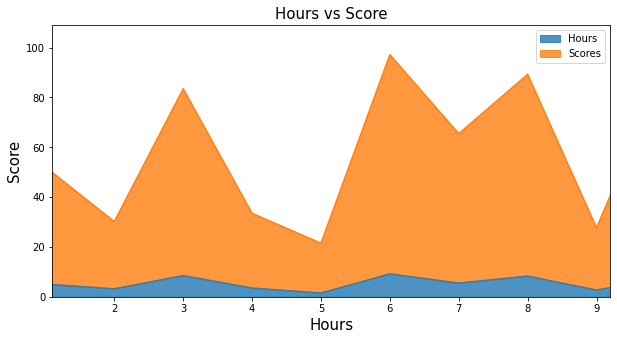

In [9]:
xmin=min(df.Hours)
xmax=max(df.Hours)
df.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title('Hours vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

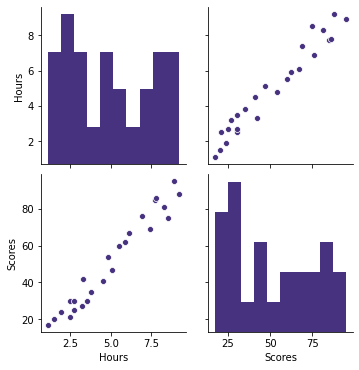

In [10]:
sns.set_palette('viridis')
sns.pairplot(df)
plt.show()

Plotting a regression plot for the given data

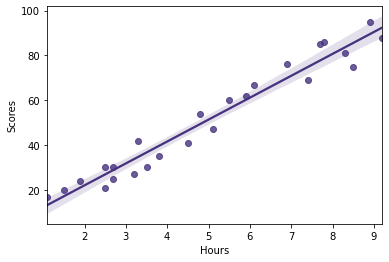

In [11]:
rp=sns.regplot(x='Hours',y='Scores',data=df)

Plotting Line Plot for data

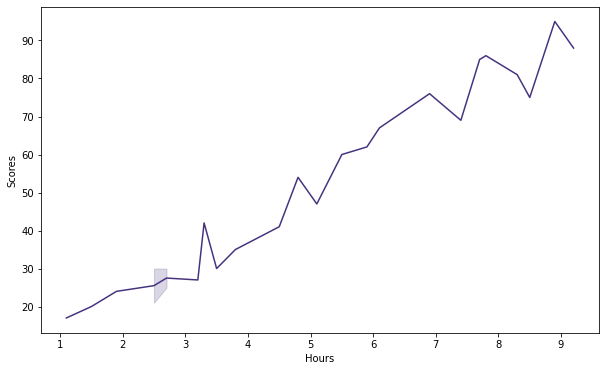

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df["Hours"],y=df["Scores"])

# Preparing the data

In [13]:
x = df[['Hours']]
y = df.Scores

In [14]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [15]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

Splitting the data into training and testing tests 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.25, random_state=3)

# Training the model

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
print('Training..')
lr.fit(x_train, y_train) 

print("training complete")

Training..
training complete


In [18]:
print("The intercept of the reg line",lr.intercept_)

The intercept of the reg line 1.5966760299625236


In [19]:
print("The coffecient of the line",lr.coef_[0])

The coffecient of the line 9.684866573033712


Plotting Regression Line for Training Data

In [20]:
line = lr.coef_*x+lr.intercept_

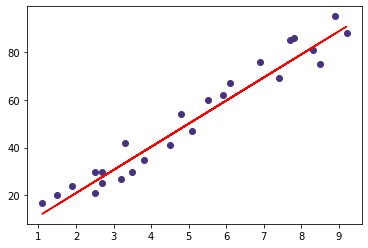

In [21]:
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='r')
plt.show()

# Predicting the data using the model

In [22]:
#Testing the variables to test the trained model
print(x_test)

    Hours
18    6.1
17    1.9
12    4.5
23    6.9
15    8.9
16    2.5
13    3.3


In [23]:
y_pred=lr.predict(x_test)

In [24]:
df_actvspred= pd.DataFrame({'Actual  ': y_test, ' Predicted': y_pred})  
df_actvspred

,Actual,Predicted
18,67,60.674362
17,24,19.997923
12,41,45.178576
23,76,68.422255
15,95,87.791989
16,30,25.808842
13,42,33.556736


In [25]:
import numpy as np
hours =np.array([9.2,7,4.6,8,6,5]).reshape(-1,1)

In [26]:
upred = lr.predict(hours)
unseen= pd.DataFrame({'hours ': hours.flatten(), 'predicted score': upred})  
unseen

,hours,predicted score
0,9.2,90.697449
1,7.0,69.390742
2,4.6,46.147062
3,8.0,79.075609
4,6.0,59.705875
5,5.0,50.021009


Predicting the score for 9.25 hours of study per day

In [27]:
hours=[[9.25]]
pred=lr.predict(hours)
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [9.25]
Predicted Score = 91.18169183052436


Evaluating the Model

In [28]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.989495552434456
